<a href="https://colab.research.google.com/github/Abdelmalek-Djemaa/Basic-Image-Classification-with-TensorFlow/blob/main/Basic_Image_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Image Classification with TensorFlow

### Import TensorFlow

In [27]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Task 1: The Dataset
### Import MNIST

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Shapes of Imported Arrays

In [5]:
print(f"x_train.shape : {x_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"x_test.shape : {x_test.shape}")
print(f"y_test.shape : {y_test.shape}")

x_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
x_test.shape : (10000, 28, 28)
y_test.shape : (10000,)


### Plot an Image Example

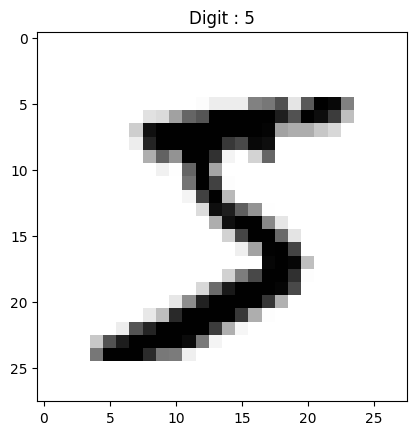

In [12]:
plt.imshow(x_train[0] , cmap = 'binary')
plt.title(f"Digit : {y_train[0]}")
plt.show()

### Display Labels

In [13]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 2: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [14]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [16]:
print(f"y_train_encoded.shape : {y_train_encoded.shape}")
print(f"y_test_encoded.shape : {y_test_encoded.shape}")

y_train_encoded.shape : (60000, 10)
y_test_encoded.shape : (10000, 10)


### Display Encoded Labels

In [18]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Task 3: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [21]:
x_train_reshaped = np.reshape(x_train ,(60000 , 784))
x_test_reshaped = np.reshape(x_test ,(10000 , 784))
print(f"x_train_reshaped.shape : {x_train_reshaped.shape}")
print(f"x_test_reshaped.shape : {x_test_reshaped.shape}")

x_train_reshaped.shape : (60000, 784)
x_test_reshaped.shape : (10000, 784)


### Display Pixel Values

In [23]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [24]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

### Display Normalized Pixel Values

In [25]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 4: Creating a Model
### Creating the Model

In [28]:
model = Sequential([
    Dense(units = 128 , activation = 'relu' , input_shape = (784 , )),
    Dense(units = 128 , activation = 'relu'),
    Dense(units = 10 , activation = 'softmax')
])

### Compiling the Model

In [29]:
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Task 5: Training the Model

### Training the Model

In [31]:
model.fit(
    x_train_norm ,
    y_train_encoded ,
    validation_data = (x_test_norm , y_test_encoded),
    epochs = 10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
    )


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2132 - accuracy: 0.9350 - val_loss: 0.1102 - val_accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.0986 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0932 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.1004 - val_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.1076 - val_accuracy: 0.9728


### Evaluating the Model

In [32]:
loss , accuracy = model.evaluate(x_test_norm , y_test_encoded)
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9728
Loss : 0.10755937546491623
Accuracy : 0.9728000164031982


# Task 6: Predictions

### Predictions on Test Set

In [39]:
prediction = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


### Plotting the Results

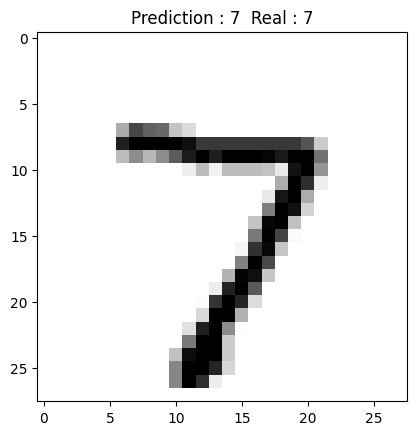

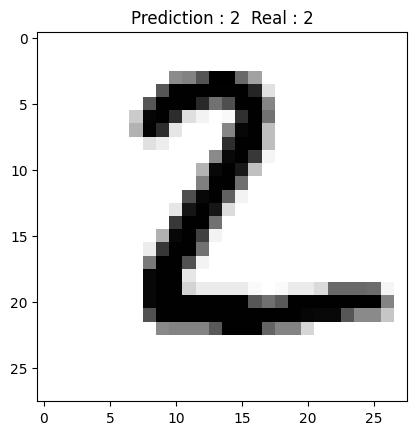

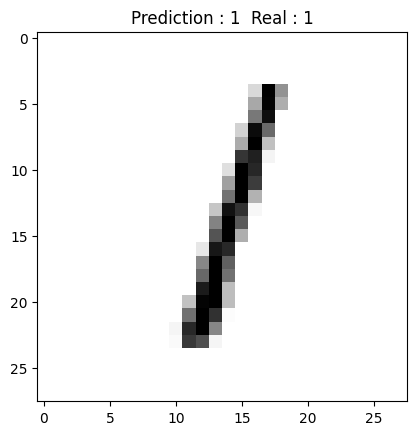

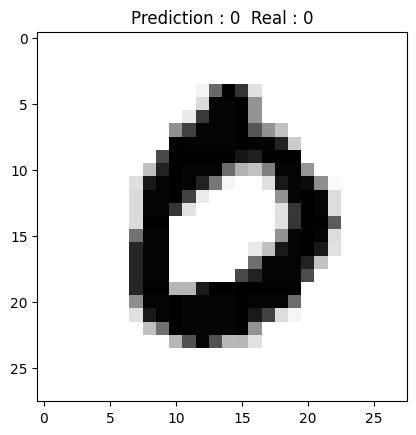

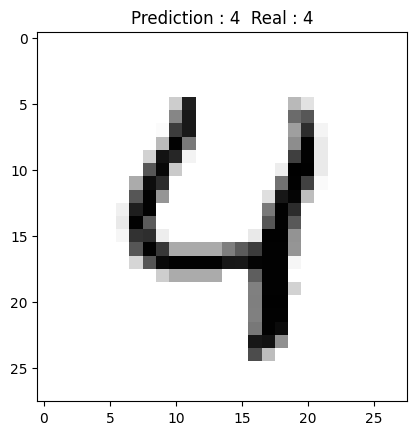

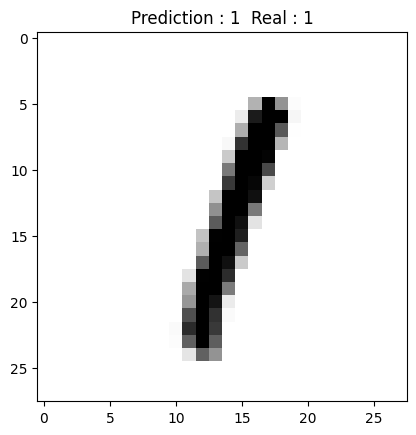

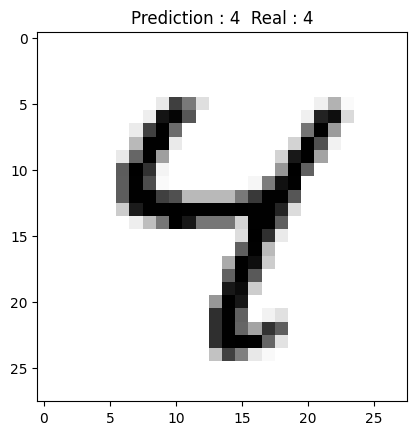

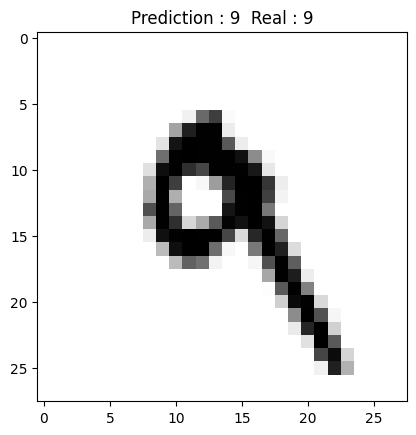

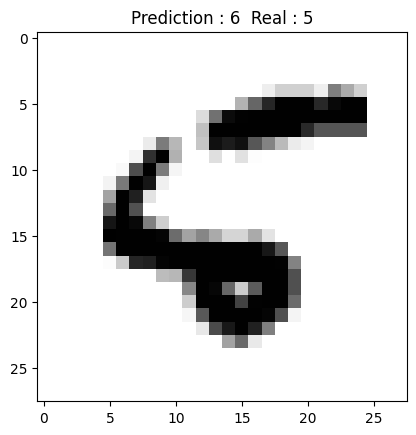

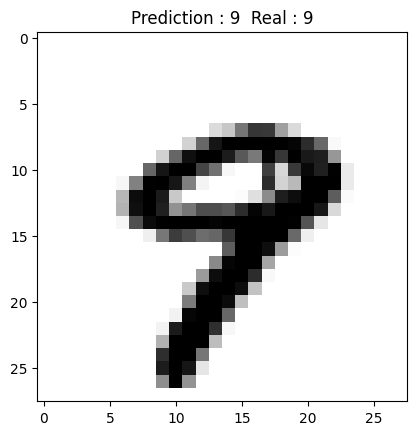

In [42]:
for i in range(10):
    plt.imshow(x_test[i] , cmap = 'binary')
    plt.title(f"Prediction : {np.argmax(prediction[i])}  Real : {y_test[i]}")
    plt.show()